## Correlator Example

We are often dealing with lists of observables defined at every time slice. For a more convenient analysis, those can be represented using the "correlators.Corr" class.
This is especially useful, if there is not one Obs per time slice, but a whole smearing matrix. We will load an example of such an object.

In [11]:
import pyerrors as pe
import autograd.numpy as np
P5P5=pe.load_object("data/Example_Corr_P5P5.p")
print(P5P5.T, P5P5.N)

64 4


What we just printed out, are the only parameters a Corr has. T represents the number of time slices and N the rank of the NxN smearing matrix. 
The content is accessible with P5P5.content and gives a list of np.arrays of obs. There is no formal difference between correlators, which contain a single observable per time slice 
and those, which hold a smearing matrix. 
To initialize a Corr, we only need to pass the content or in the case of N=1, we might pass a list of obs.
Lets run some code!

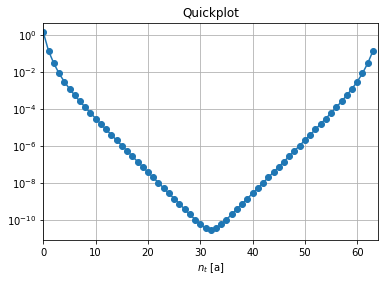

<Figure size 432x288 with 0 Axes>

In [18]:
P5P5.symmetric().projected().show(logscale=True)

We will go over this line the way it is executed, left to right. 
The correlator has a method called **symmetric()**, which returns a time symmetrized version of itself. 
We did not need to redo the error estimation. While a Corr has a **.gamma_method()** defined, which simply applies the Obs.gamma_method() to every Obs in the correlator, 
this is done automatically, whenever a new corr is initiated. This is a little slow, but convenient. The next method called is **.projected()**. 
This methods *projects* the smearing matrices $G(t)$ with a set of vectors, returning a single value at every $t$. $$v_l^T G(t) v_r$$ Since we did not pass an argument, it defaulted to $v_l=v_r=(1,0,...,0)$, giving us $G(t)[0,0]$ . The method returns another Corr, but this time with N=1.   
          The last method **.show()** just allows us to quickly inspect a correlator.     
Let us now look at the GEVP. 


In [13]:
eigenvector=P5P5.symmetric().GEVP(t0=3,ts=6)
print(eigenvector)

[-6.26306805e-04  1.64198098e-01 -5.99926044e-01  7.83024479e-01]


**.GEVP()** Needs two time indices as arguments. It then solves:

$$G(t_s)v=\lambda G(t_0)v$$

and returns the vector $v$ for the largest eigenvalue. It uses a *Scipy* method, which itself is based on a *LAPACK* method. 
To really see the difference this makes, we can visualize the effective mass, which we also have a method for.

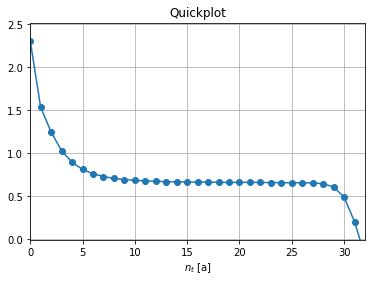

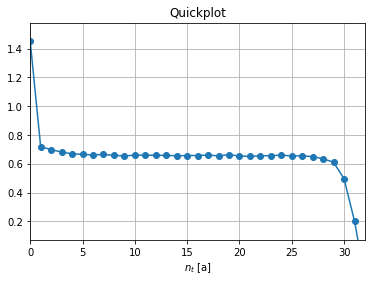

<Figure size 432x288 with 0 Axes>

In [14]:
P5P5.symmetric().projected().m_eff().show([0,32])
P5P5.symmetric().projected(eigenvector).m_eff().show([0,32])

The plateau is definetely larger now. We can use it to extract the pseudoscalar mass. All we need is a plateau range. 
Finding those can be time consuming, if we are dealing with many correlators and we need to zoom in to the plot, to see the range properly.
We can call a GUI method to help us to visualize the range. Play around with the checkboxes at the bottom of the window to make the program adjust plot to your selected range.

In [15]:
m_eff=P5P5.symmetric().projected(eigenvector).m_eff() # Our lines were getting a little long, so we just assign a new Corr. 
plateau_range=pe.correlators.GUI_range_finder(m_eff)
m_p=m_eff.plateau(plateau_range)
print("The pseudoscalar mass is: ",m_p)

The pseudoscalar mass is:  Obs[0.64457(66)]


For fun you can compare your result with https://arxiv.org/abs/1912.09937v1 Table XV (the first value for $am_{H_{is}}$).    
Before we wrap up, we should look at Corrs and math operations. They can be multiplied by and added to other Corrs (of same N,T), or scaled by an Obs or float. 
Usually the operation is just done for every value at the same time and smearing. 



In [16]:
new_correlator=0.5*P5P5+np.sqrt(P5P5)/np.sin(P5P5**2)+np.arcsinh(P5P5)
print(new_correlator.T, new_correlator.N)

64 4


This is a senseless but valid expression, which does exactly, what one would expect. It returns a Corr of the same shape as P5P5. 
 It is really important, that there is never any confusion about the appropriate time slices. Lets look at *m_eff* once again. 
 By default it is calculated as $$ m_{eff}(t)=\ln(\frac{Corr[t]}{Corr[t+1]})$$ 
 Therefore m_eff is only defined up to the second to last time slice. But the method appends a **None** object, so that m_eff.T=64.   
    If we add m_eff to P5P5.projected(), the resulting Corr would still have T=64, with the last item being **None**. 
Another reason for a Corr being **None** at one time slice, is a division by zero or other undefined operation. 
Even if a Corr is partially undefined, math operations still work, as long as T and N are identical.
 

In [17]:
print((m_eff+P5P5.projected()).T)

64
